# Exploratory Data Analysis: Student Performance

**Author:** Ezra Okere  
**Date:** December 2025  

## Objective
The objective of this exploratory data analysis is to understand the structure of the student performance dataset, explore relationships between study habits, attendance, background factors, and academic outcomes, and uncover insights that explain variations in students’ overall performance.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(
    r'C:\Users\user\Desktop\Dataset\Student_Performance.csv'
)

In [3]:
df.head()

,student_id,age,gender,school_type,parent_education,study_hours,attendance_percentage,internet_access,travel_time,extra_activities,study_method,math_score,science_score,english_score,overall_score,final_grade
0,1,14,male,public,post graduate,3.1,84.3,yes,<15 min,yes,notes,42.7,55.4,57.0,53.1,e
1,2,18,female,public,graduate,3.7,87.8,yes,>60 min,no,textbook,57.6,68.8,64.8,61.3,d
2,3,17,female,private,post graduate,7.9,65.5,no,<15 min,no,notes,84.8,95.0,79.2,89.6,b
3,4,16,other,public,high school,1.1,58.1,no,15-30 min,no,notes,44.4,27.5,54.7,41.6,e
4,5,16,female,public,high school,1.3,61.0,yes,30-60 min,yes,group study,8.9,32.7,30.0,25.4,f


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   student_id             25000 non-null  int64  
 1   age                    25000 non-null  int64  
 2   gender                 25000 non-null  object 
 3   school_type            25000 non-null  object 
 4   parent_education       25000 non-null  object 
 5   study_hours            25000 non-null  float64
 6   attendance_percentage  25000 non-null  float64
 7   internet_access        25000 non-null  object 
 8   travel_time            25000 non-null  object 
 9   extra_activities       25000 non-null  object 
 10  study_method           25000 non-null  object 
 11  math_score             25000 non-null  float64
 12  science_score          25000 non-null  float64
 13  english_score          25000 non-null  float64
 14  overall_score          25000 non-null  float64
 15  fi

In [5]:
df.index

RangeIndex(start=0, stop=25000, step=1)

In [6]:
df.describe()

,student_id,age,study_hours,attendance_percentage,math_score,science_score,english_score,overall_score
count,25000.00000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,7493.04380,16.482760,4.253224,75.084084,63.785944,63.745320,63.681948,64.006172
std,4323.56215,1.703895,2.167541,14.373171,20.875262,20.970529,20.792693,18.932025
min,1.00000,14.000000,0.500000,50.000000,0.000000,0.000000,0.000000,14.500000
25%,3743.75000,15.000000,2.400000,62.800000,48.300000,48.200000,48.300000,49.000000
50%,7461.50000,16.000000,4.300000,75.100000,64.100000,64.100000,64.200000,64.200000
75%,11252.00000,18.000000,6.100000,87.500000,80.000000,80.000000,80.000000,79.000000
max,15000.00000,19.000000,8.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [7]:
df.shape

(25000, 16)

## Are there missing or duplicated records?

In [8]:
df.isnull().sum()    # to check for missing values

student_id               0
age                      0
gender                   0
school_type              0
parent_education         0
study_hours              0
attendance_percentage    0
internet_access          0
travel_time              0
extra_activities         0
study_method             0
math_score               0
science_score            0
english_score            0
overall_score            0
final_grade              0
dtype: int64

### There is no missing values in the dataset

In [9]:
df.duplicated().sum()   # to check for duplicates

np.int64(10000)

### Since there's no unique identifier in the columns. It is very normal for two or more students to have: the same age, same gender, same school type, same study hours, some socores and same final grade. 

### Duplicates become a problem only when they violent uniqueness. Each row represent one student, the student_id must be unique. Let me check if there's any row duplicate.

In [10]:
df.duplicated(subset='student_id').sum()  # there is 10000 duplicates of student

np.int64(10000)

### There is 10,000 duplicated student id, which I will now drop

In [11]:
df.drop_duplicates(subset='student_id',
                   keep='first', inplace=True) # drop the duplicates but keep the first occurence

In [12]:
df.duplicated(subset='student_id').sum() # there's no more duplicate of any student

np.int64(0)

### How Many Students are in the dataset?

In [13]:
df.shape

(15000, 16)

### There are 15,000 students in this dataset

In [14]:
df = df.set_index('student_id')

### Which columns are numerical vs categorical?

In [15]:
df.columns

Index(['age', 'gender', 'school_type', 'parent_education', 'study_hours',
       'attendance_percentage', 'internet_access', 'travel_time',
       'extra_activities', 'study_method', 'math_score', 'science_score',
       'english_score', 'overall_score', 'final_grade'],
      dtype='object')

## Numerical columns: 
### age, study_hours, attendance_percentage, math_score, science_score, english_score and overall_score
## Categorical columns: 
### gender, travel_time, school_type, parent_education, internet_access, extra_activities, study_method and final_grade

# 1. Univariant Analysis 

In [16]:
age_mean = df.age.mean()
age_median = df.age.median()
age_std = df.age.std()
age_min = df.age.min()
age_max = df.age.max()

study_mean = df.study_hours.mean()
study_median = df.study_hours.median()
study_std = df.study_hours.std()
study_min = df.study_hours.min()
study_max = df.study_hours.max()

atten_mean = df.attendance_percentage.mean()
atten_median = df.attendance_percentage.median()
atten_std = df.attendance_percentage.std()
atten_min = df.attendance_percentage.min()
atten_max = df.attendance_percentage.max()

print(f"Average Age: {age_mean}")
print(f"Age Median: {age_median}")
print(f"Age Standard Deviation: {age_std}")
print(f"Minimum Age: {age_min}")
print(f"Maximum Age: {age_max}")

print(f"\nAverage Study Hour: {study_mean}")
print(f"Study Hour Median: {study_median}")
print(f"Study Hour Standard Deviation: {study_std}")
print(f"Minimum Study Hour: {study_min}")
print(f"Maximum Study Hour: {study_max}")

print(f"\nAverage Attendance Percentage: {atten_mean}")
print(f"Attendance Percentage Median: {atten_median}")
print(f"Attendance Percentage Standard Deviation: {atten_std}")
print(f"Minimum Attendance Percentage: {atten_min}")
print(f"Maximum Attendance Percentage: {atten_max}")

math_mean = df.math_score.mean()
math_median = df.math_score.median()
math_std = df.math_score.std()
math_min = df.math_score.min()
math_max = df.math_score.max()

science_mean = df.science_score.mean()
science_median = df.science_score.median()
science_std = df.science_score.std()
science_min = df.science_score.min()
science_max = df.science_score.max()

english_mean = df.english_score.mean()
english_median = df.english_score.median()
english_std = df.english_score.std()
english_min = df.english_score.min()
english_max = df.english_score.max()

overall_mean = df.overall_score.mean()
overall_median = df.overall_score.median()
overall_std = df.overall_score.std()
overall_min = df.overall_score.min()
overall_max = df.overall_score.max()

print(f"\nAverage Math Score: {math_mean}")
print(f"Math Score Median: {math_median}")
print(f"Math Score Standard Deviation: {math_std}")
print(f"Minimum Math Score: {math_min}")
print(f"Maximum Math Score: {math_max}")

print(f"\nAverage Science Score: {science_mean}")
print(f"Science Score Median: {science_median}")
print(f"Science Score Standard Deviation: {science_std}")
print(f"Minimum Science Score: {science_min}")
print(f"Maximum Science Score: {science_max}")

print(f"\nAverage English Score: {english_mean}")
print(f"English Score Median: {english_median}")
print(f"English Score Standard Deviation: {english_std}")
print(f"Minimum English Score: {english_min}")
print(f"Maximum English Score: {english_max}")

print(f"\nAverage Overall Score: {overall_mean}")
print(f"Overall Score Median: {overall_median}")
print(f"Overall Score Standard Deviation: {overall_std}")
print(f"Minimum Overall Score: {overall_min}")
print(f"Maximum Overall Score: {overall_max}")

Average Age: 16.4764
Age Median: 16.0
Age Standard Deviation: 1.7044754977552958
Minimum Age: 14
Maximum Age: 19

Average Study Hour: 4.25936
Study Hour Median: 4.3
Study Hour Standard Deviation: 2.172440491761746
Minimum Study Hour: 0.5
Maximum Study Hour: 8.0

Average Attendance Percentage: 74.99176
Attendance Percentage Median: 75.0
Attendance Percentage Standard Deviation: 14.40113920111019
Minimum Attendance Percentage: 50.0
Maximum Attendance Percentage: 100.0

Average Math Score: 63.77455333333334
Math Score Median: 64.1
Math Score Standard Deviation: 20.91995777822504
Minimum Math Score: 0.0
Maximum Math Score: 100.0

Average Science Score: 63.75122666666667
Science Score Median: 64.0
Science Score Standard Deviation: 21.027675351878592
Minimum Science Score: 0.0
Maximum Science Score: 100.0

Average English Score: 63.709226666666666
English Score Median: 64.2
English Score Standard Deviation: 20.860201390896496
Minimum English Score: 0.0
Maximum English Score: 100.0

Average O

### Although travel_time represents time, it is recorded as ranges rather than exact values. Therefore, it is treated as an ordinal categorical variable. The categories have a natural order, which allows ordered comparisons but not numerical aggregation such as mean or standard deviation.

## Visualising the Dataset

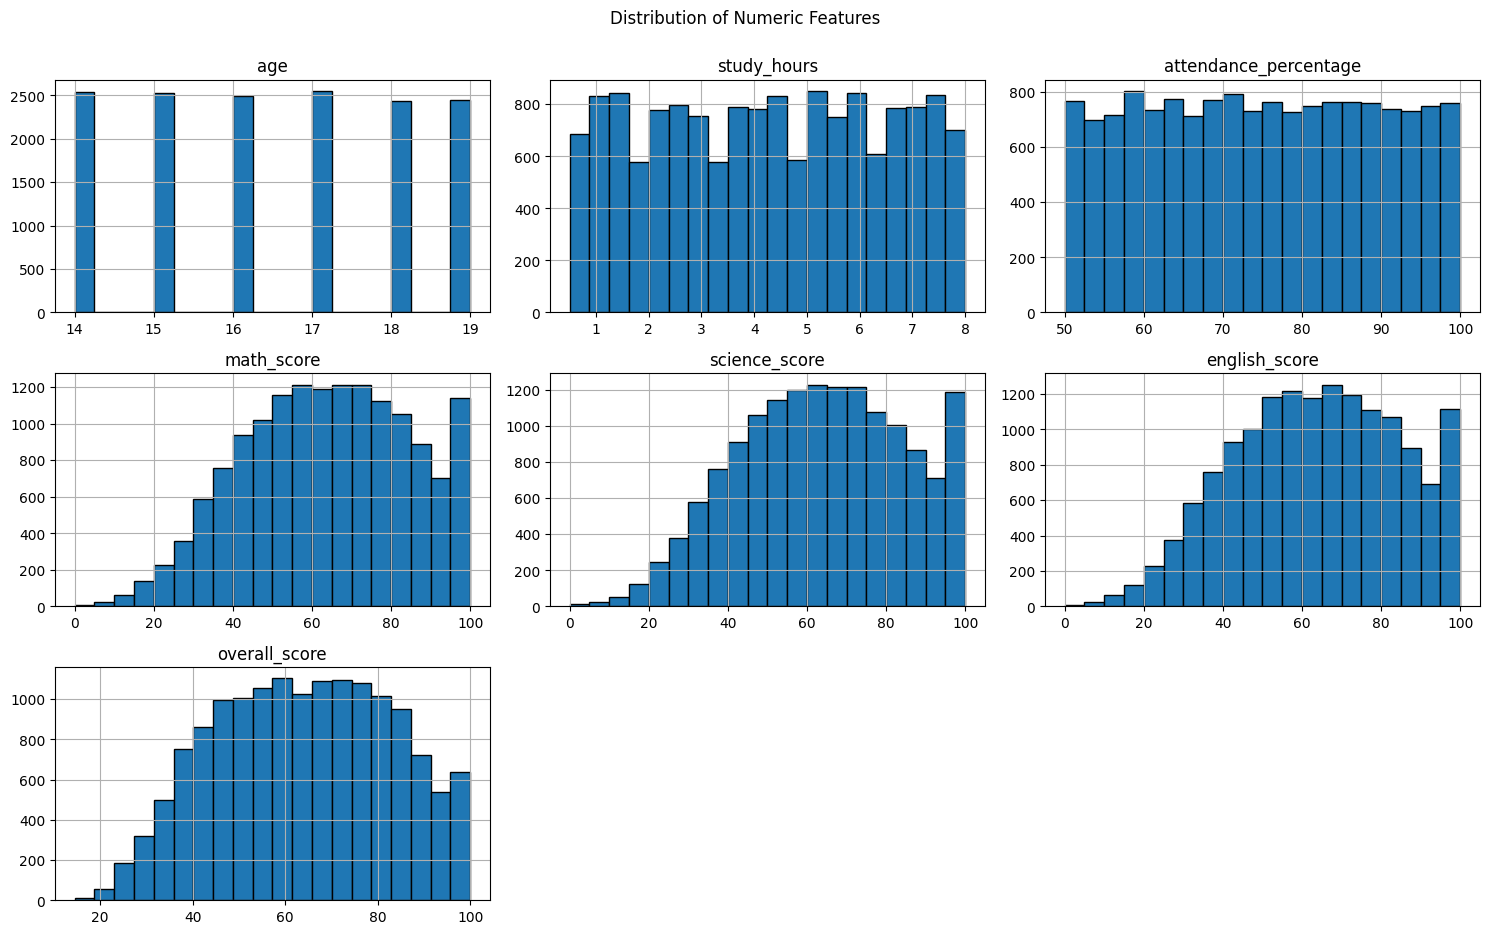

In [17]:
df.hist(bins=20, figsize=(15, 12), layout=(4, 3), edgecolor='black')
plt.suptitle('Distribution of Numeric Features', y=1.00)
plt.tight_layout()
plt.show()

In [18]:
df_numeric = df.select_dtypes(include=['float64', 'int64'])

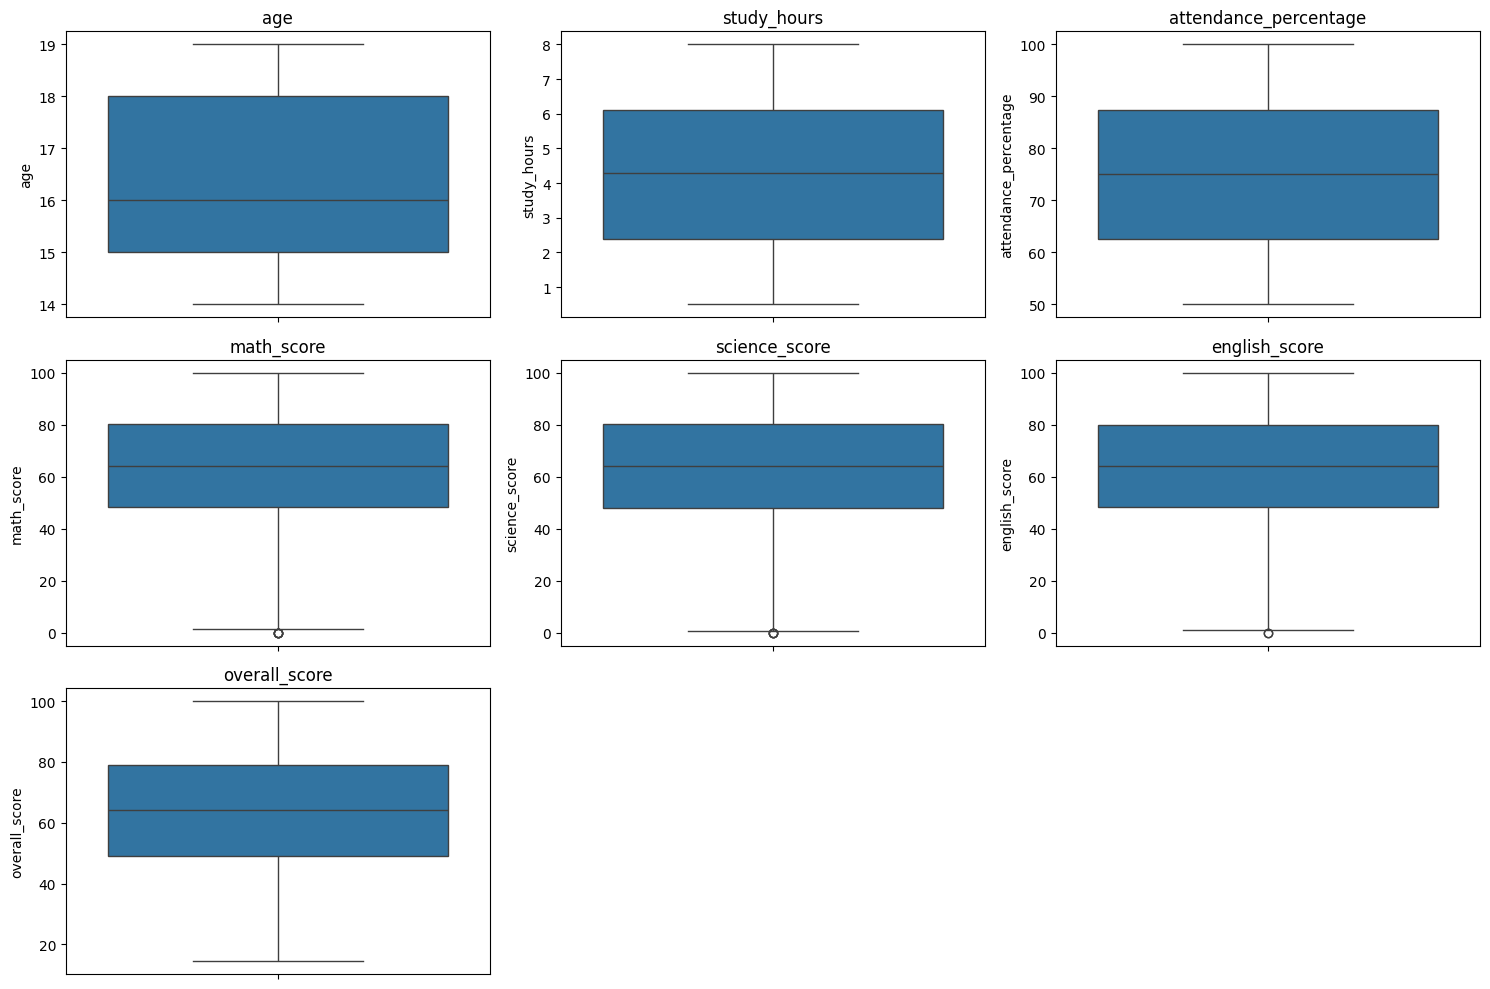

In [19]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(df_numeric.columns):
    sns.boxplot(y=df_numeric[col], ax=axes[i])
    axes[i].set_title(col)

for j in range(len(df_numeric.columns), len(axes)):
    axes[j].axis('off') # This line hides the empty axis

plt.tight_layout()
plt.show()

### What is the average study time?

In [20]:
df.study_hours.mean()

np.float64(4.25936)

### The average study time is 4.25936 hours

### Are math scoress skewed or normally distributed?

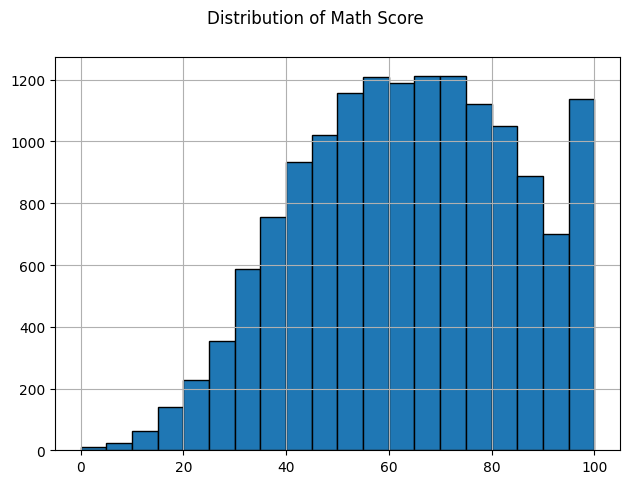

In [21]:
df.math_score.hist(bins=20, edgecolor='black')
plt.suptitle('Distribution of Math Score', y=1.00)
plt.tight_layout()
plt.show()

### Math score is skewed to the left this means that most student passed math

### Are there extreme values in attendance?

### An extreme value (outlier) is a value that lies far from the majority of the data.

In [22]:
bins = [40, 50, 60, 70, 80, 90, 100]
labels = ['40-50%', '50-60%', '60-70%', '70-80%', '80-90%', '90-100%']

In [23]:
df['attendance_group'] = pd.cut(df['attendance_percentage'],
                                bins=bins,
                                labels=labels,
                                include_lowest=True)


In [24]:
# count students per group
counts = df['attendance_group'].value_counts(sort=False) # keep order
counts

attendance_group
40-50%       22
50-60%     2985
60-70%     2997
70-80%     3010
80-90%     3032
90-100%    2954
Name: count, dtype: int64

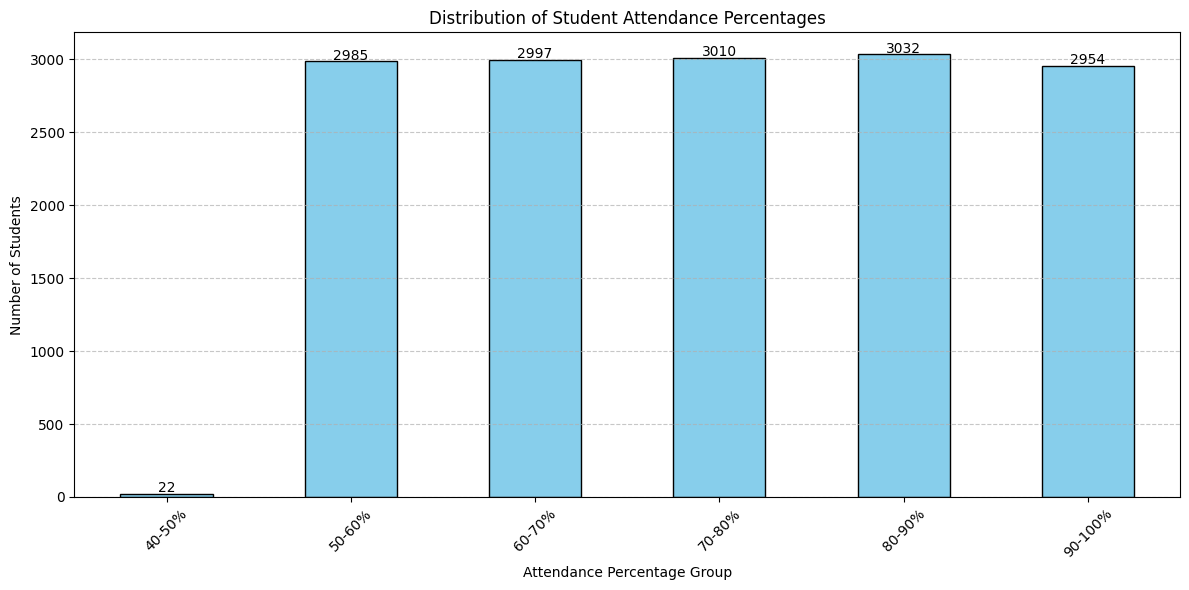

In [25]:
# Bar plot 
plt.figure(figsize=(12, 6))
counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Distribution of Student Attendance Percentages')
plt.xlabel('Attendance Percentage Group')
plt.ylabel('Number of Students')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Percentage labels on bars 
for i, v in enumerate(counts):
    plt.text(i, v + 10, str(v), ha='center')

plt.tight_layout()
plt.show()

### Looking at this distribution of student attendance percentages, there are no extreme values. The 40 - 50% attendance group has only 22 students, which is dramatically lower than the other groups. However, this is not an "extreme value" or outlier - it simply indicates that very few students have such poor attendance (which is a positive finding). 
### Overall assessment: The data shows a healthy, normal distribution where the vast majority of students fall into the 50-100% attendance range with relatively even distribution across these categories. The small number in the 40-50% range is expected and reflects that most students maintain reasonable attendance rates. 

In [26]:
gender_counts = df.gender.value_counts()
gender_percent = df.gender.value_counts(normalize=True) * 100

travel_counts = df.travel_time.value_counts()
travel_percent = df.travel_time.value_counts(normalize=True) * 100

school_counts = df.school_type.value_counts()
school_percent = df.school_type.value_counts(normalize=True) * 100

parent_counts = df.parent_education.value_counts()
parent_percent = df.parent_education.value_counts(normalize=True) * 100

internet_counts = df.internet_access.value_counts()
internet_percent = df.internet_access.value_counts(normalize=True) * 100
print(f"Gender Value Count: {gender_counts}")
print(f"\nGender Percentage: {gender_percent}")
print("\n#######################################")
print(f"Travel Time Value Count: {travel_counts}")
print(f"\nTravel Time Percentage: {travel_percent}")
print("\n#######################################")
print(f"School Type Value Count: {school_counts}")
print(f"\nSchool Type Percentage: {school_percent}")
print("\n#######################################")
print(f"Parent Education Value Count: {parent_counts}")
print(f"\nParent Education Percentage: {parent_percent}")
print("\n#######################################")
print(f"Internet Access Value Count: {internet_counts}")
print(f"\nInternet Access Percentage: {internet_percent}")

extra_counts = df.extra_activities.value_counts()
extra_percent = df.extra_activities.value_counts(normalize=True) * 100

study_counts = df.study_method.value_counts()
study_percent = df.study_method.value_counts(normalize=True) * 100

final_counts = df.final_grade.value_counts()
final_percent = df.final_grade.value_counts(normalize=True) * 100

print(f"\nExtra Activities Value Count: {extra_counts}")
print(f"\nExtra Activities Percentage: {extra_percent}")
print("\n#######################################")
print(f"Study Method Value Count: {study_counts}")
print(f"\nStudy Method Percentage: {study_percent}")
print("\n#######################################")
print(f"Final Grade Value Count: {final_counts}")
print(f"\nFinal Grade Percentage: {final_percent}")

Gender Value Count: gender
other     5042
male      4979
female    4979
Name: count, dtype: int64

Gender Percentage: gender
other     33.613333
male      33.193333
female    33.193333
Name: proportion, dtype: float64

#######################################
Travel Time Value Count: travel_time
15-30 min    3823
30-60 min    3813
>60 min      3716
<15 min      3648
Name: count, dtype: int64

Travel Time Percentage: travel_time
15-30 min    25.486667
30-60 min    25.420000
>60 min      24.773333
<15 min      24.320000
Name: proportion, dtype: float64

#######################################
School Type Value Count: school_type
private    7587
public     7413
Name: count, dtype: int64

School Type Percentage: school_type
private    50.58
public     49.42
Name: proportion, dtype: float64

#######################################
Parent Education Value Count: parent_education
diploma          2581
post graduate    2535
high school      2532
graduate         2481
no formal        2445
phd   

# Bar plots to visualize the Categorical Columns

In [27]:
df_object = df.select_dtypes(include="object")

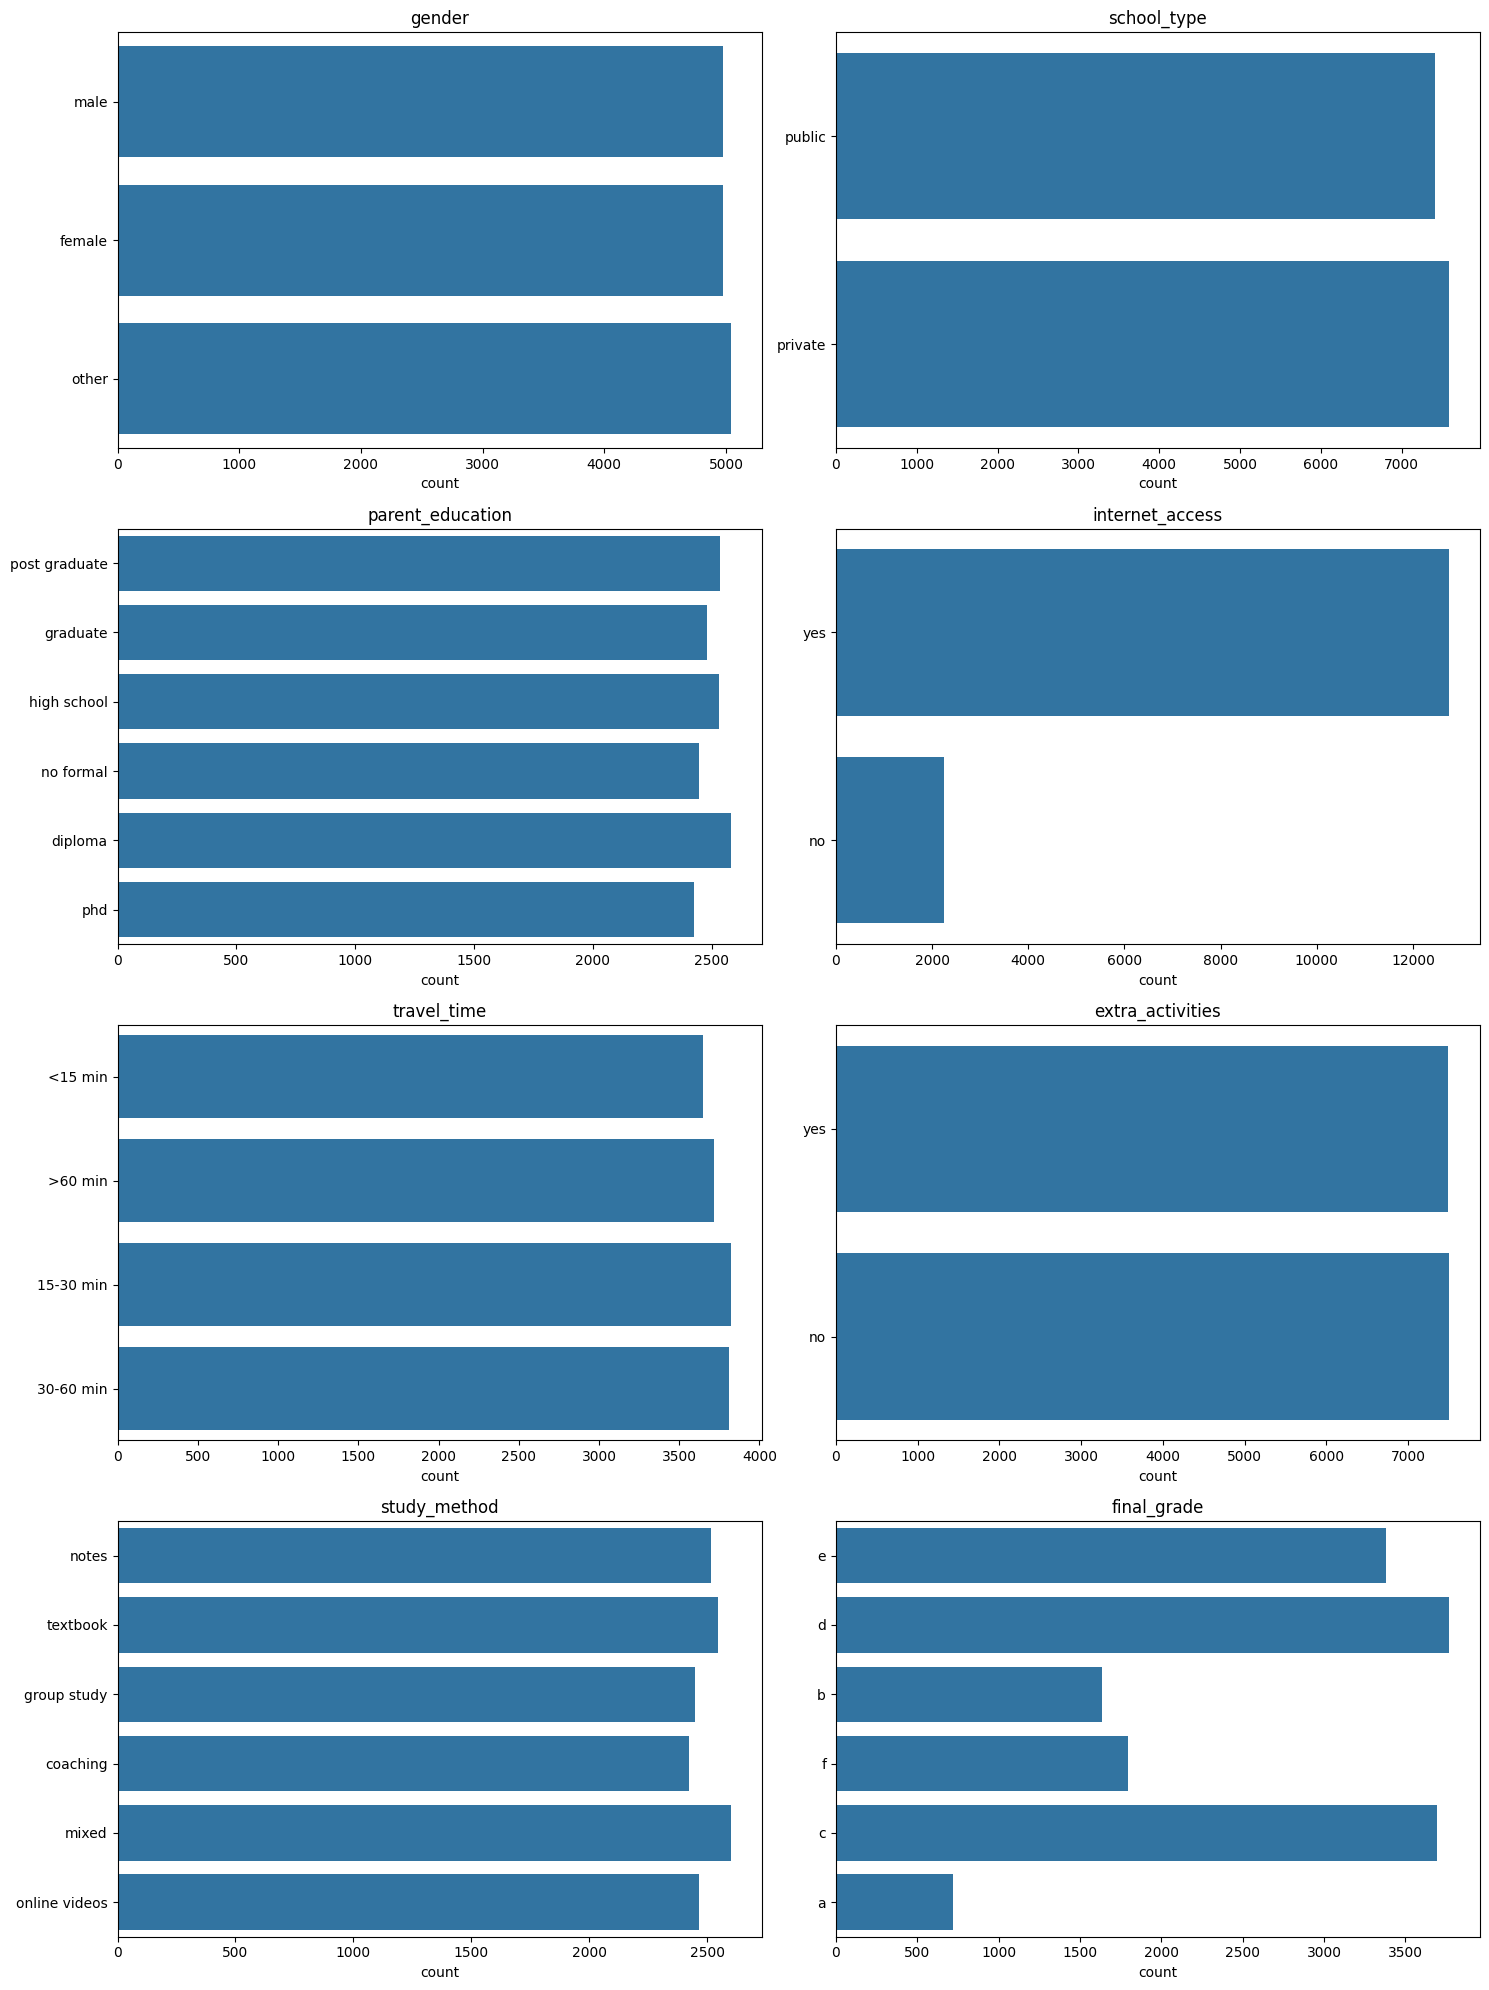

In [28]:
fig, axes = plt.subplots(4, 2, figsize=(15, 20))  
axes = axes.flatten()

for i, col in enumerate(df_object.columns):
    sns.countplot(y=col, data=df, ax=axes[i])   
    axes[i].set_title(col)        
    axes[i].set_ylabel('')        
    axes[i].set_xlabel('count')    

plt.tight_layout()
plt.show()

### Which gender has more students?

In [29]:
df.gender.value_counts()

gender
other     5042
male      4979
female    4979
Name: count, dtype: int64

### "Other" gender has more students, with a count of 5042

### How many students have internet access?

In [30]:
df.internet_access.value_counts()

internet_access
yes    12754
no      2246
Name: count, dtype: int64

### 12,754 students have internet access

### Most common study method?

In [31]:
df.study_method.value_counts()

study_method
mixed            2602
textbook         2546
notes            2515
online videos    2468
group study      2447
coaching         2422
Name: count, dtype: int64

### "mixed" study method is the most common study method, with a count of 2602

### Distribution of final grades (A, B, C, ...)

In [32]:
value_counts = df.final_grade.value_counts()

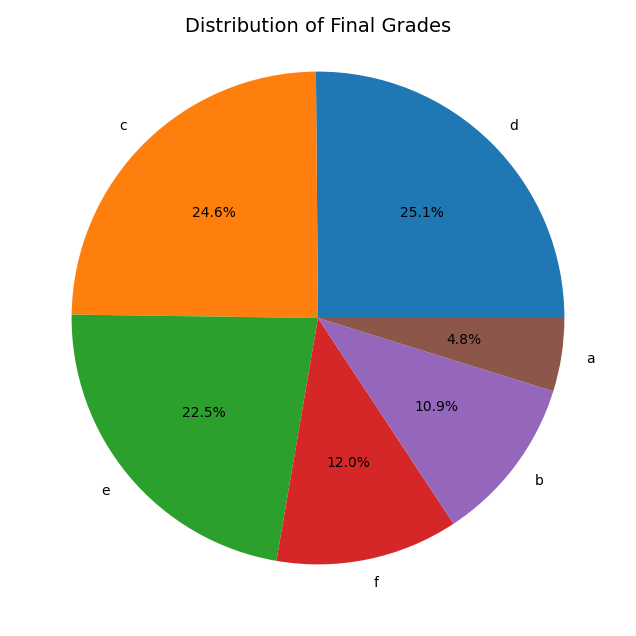

In [33]:
# Plot pie chart
plt.figure(figsize=(10, 8))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Final Grades', y=0.95, fontsize=14)
plt.show()

# 2. Bivariate Analysis 

### Scores vs Study Factors

### Study hours: 

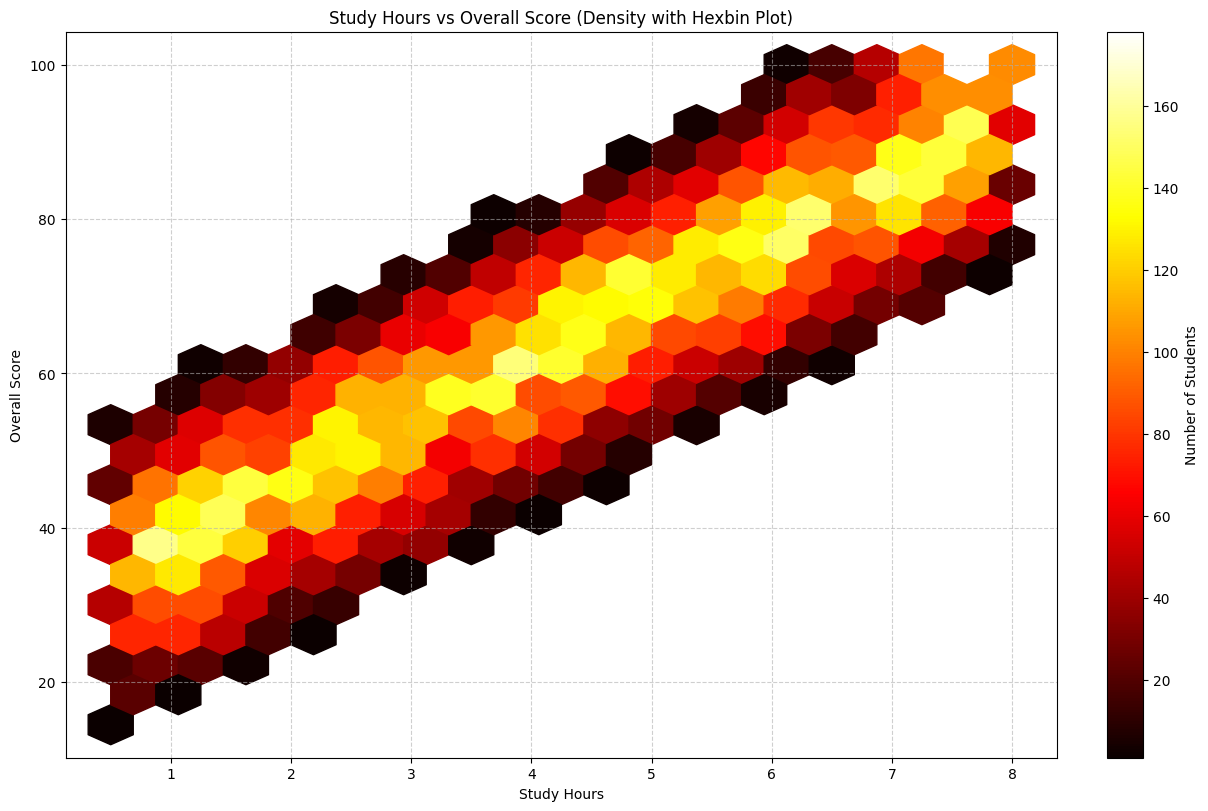

In [34]:
%matplotlib inline

plt.figure(figsize=(12, 8), dpi=100, constrained_layout=True)

plt.hexbin(
    df['study_hours'],
    df['overall_score'],
    gridsize=20,
    cmap='hot',
    mincnt=1
)

plt.colorbar(label='Number of Students')
plt.title('Study Hours vs Overall Score (Density with Hexbin Plot)')
plt.xlabel('Study Hours')
plt.ylabel('Overall Score')
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()


##### Bivariate Analysis: Study Hours vs Overall Score

The hexbin plot illustrates the relationship between students' study hours and their overall academic performance. A clear positive linear trend is observed, indicating that increased study hours are associated with higher overall scores.

Higher data densities are concentrated along an upward diagonal pattern, showing that most students who study fewer hours tend to achieve lower scores, while those who study for longer durations generally attain higher scores. In particular, students studying between 0–2 hours are largely associated with lower score ranges, whereas students studying 6–8 hours are more densely clustered within higher score ranges.

The hexbin visualization effectively reduces overplotting and highlights areas of high concentration, making the underlying relationship between study time and performance more apparent. Overall, this suggests that study hours are a strong contributing factor to academic achievement, with no significant anomalies observed.

## Study Hours vs Subject Scores

In [35]:
df.columns

Index(['age', 'gender', 'school_type', 'parent_education', 'study_hours',
       'attendance_percentage', 'internet_access', 'travel_time',
       'extra_activities', 'study_method', 'math_score', 'science_score',
       'english_score', 'overall_score', 'final_grade', 'attendance_group'],
      dtype='object')

In [36]:
def plot_hexbin(x, y, y_label, title):
    plt.figure(figsize=(10, 6))

    plt.hexbin(
        x,
        y,
        gridsize=20,
        cmap='viridis',
        mincnt=1
    )

    plt.colorbar(label='Number of Students')
    plt.title(title)
    plt.xlabel('Study Hours')
    plt.ylabel(y_label)

    plt.xticks(range(int(x.min()), int(x.max()) + 1))
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()


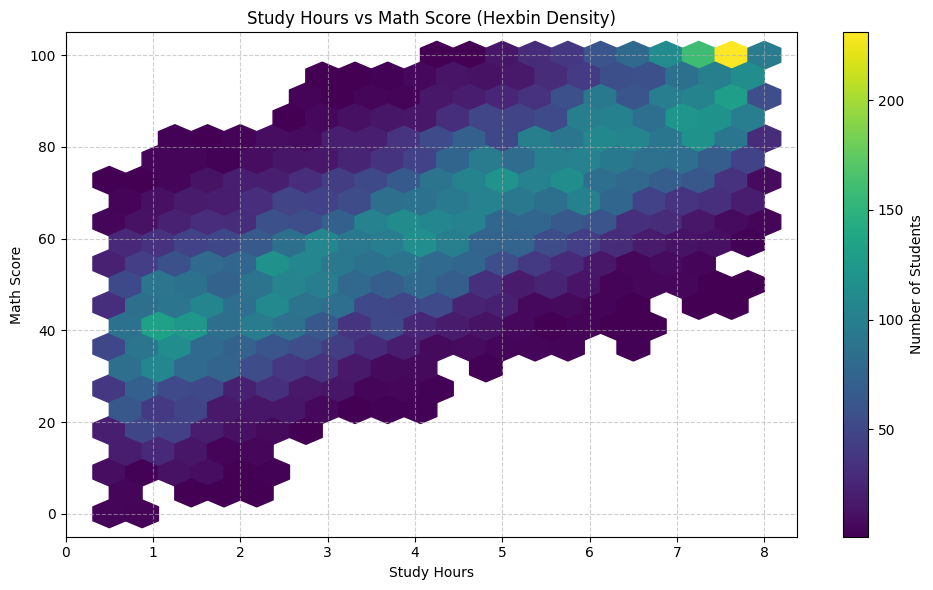

In [37]:
plot_hexbin(
    df['study_hours'],
    df['math_score'],
    'Math Score',
    'Study Hours vs Math Score (Hexbin Density)'
)

# Student Performance Analysis: Study Hours vs. Math Score

This plot explores the relationship between the time students spend studying and their Math scores using a hexbin density chart. This visualization method is ideal for large datasets, as it highlights areas of high data concentration without showing individual, overlapping points.

## What This Plot Shows:

* **Clear Trend:** The plot shows a strong **positive relationship** between study hours and math scores. As students increase their study hours, their math scores generally go up.  
*   **Student Concentration:**  
* **Brighter (yellow/light green) areas** indicate where the **most students** are located. We can see a high concentration of students who study **4-8 hours and achieve high scores (80-100)**.
* **Darker (purple/blue) areas** show fewer students. There are fewer students who study little but score high, or study a lot but score low.
* **Performance Range:** At lower study hours, scores are more varied. At higher study hours, scores are consistently high, suggesting more study time leads to more predictable good results.  

This visualization effectively demonstrates that increased study effort is strongly linked to higher academic achievement in Math.

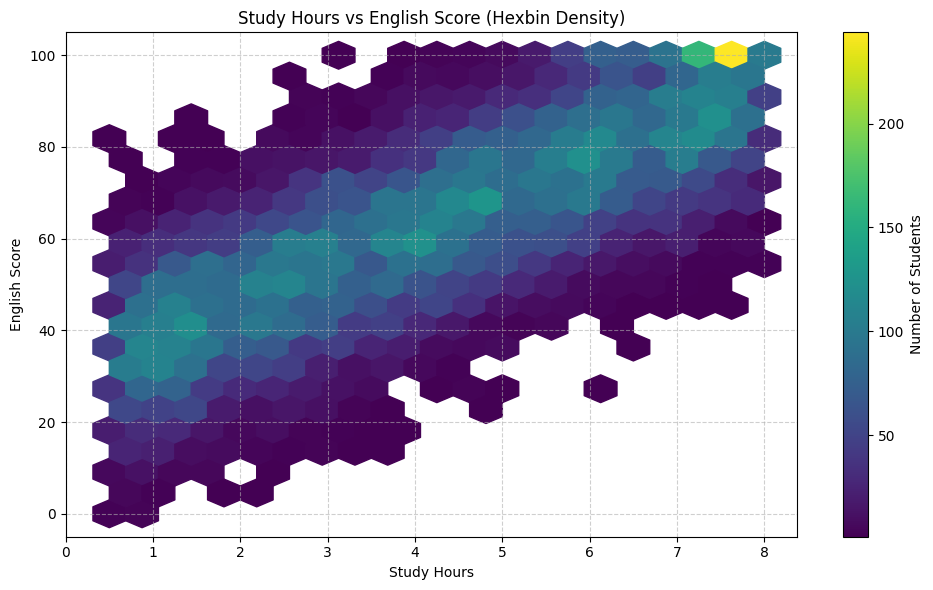

In [38]:
plot_hexbin(
    df['study_hours'],
    df['english_score'],
    'English Score',
    'Study Hours vs English Score (Hexbin Density)'
)

### **Analysis of "Study Hours vs English Score (Hexbin Density)"**

**Description:**
This hexbin density plot illustrates the distribution of students based on their study hours and corresponding English scores.
•   **X-axis:** Represents "Study Hours," ranging from 0 to 8 hours.
•   **Y-axis:** Represents "English Score," ranging from 0 to 100.
•   **Color Bar:** Indicates the "Number of Students," where darker purple represents fewer students (around 25 or less) and bright yellow represents a higher concentration of students (up to 225 or more).

**Key Observation:** Similar to the Math plot, there is a clear positive correlation between study hours and English score. As the number of study hours increases, the English score generally tends to increase.

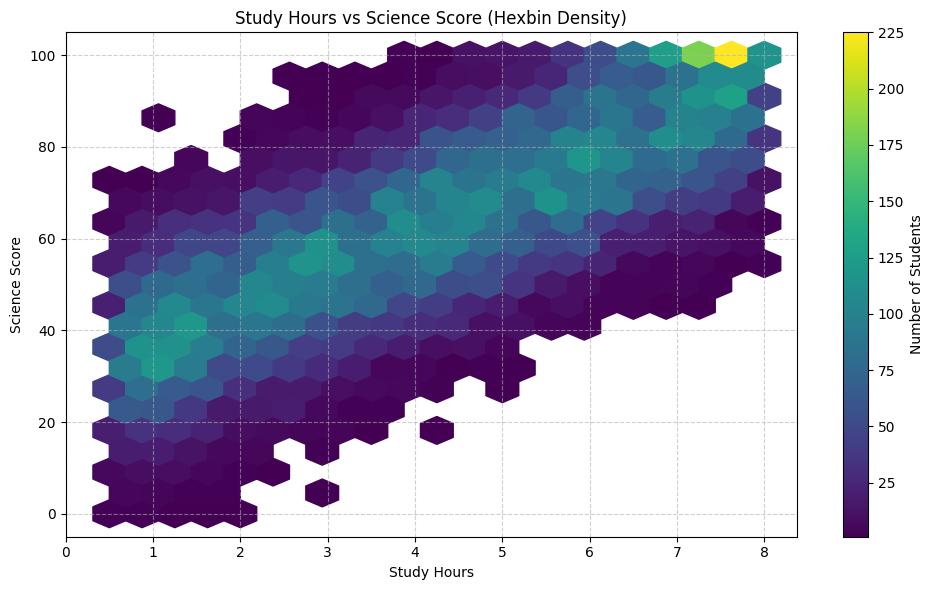

In [39]:
plot_hexbin(
    df['study_hours'],
    df['science_score'],
    'Science Score',
    'Study Hours vs Science Score (Hexbin Density)'
)

### **Analysis of "Study Hours vs Science Score (Hexbin Density)"**

**Description:**
This hexbin density plot illustrates the distribution of students based on their study hours and corresponding Science scores.
•   **X-axis:** Represents "Study Hours," ranging from 0 to 8 hours.
•   **Y-axis:** Represents "Science Score," ranging from 0 to 100.
•   **Color Bar:** Indicates the "Number of Students," where darker purple represents fewer students (around 25 or less) and bright yellow represents a higher concentration of students (up to 225 or more).

**Key Observation:** There is a clear positive correlation between study hours and Science score. As the number of study hours increases, the Science score generally tends to increase.

**Comparison of the Three Plots** show a strong positive correlation between study hours and scores for Math, English and Science. More study hours consistently lead to higher scores, and fewer study hours correlate with lower scores.

## Do more study hours lead to better scores?
Yes. In both graphs, studying more hours clearly leads to higher scores.

## Is there a point of diminishing returns?
Based on the provided data, there is no clear evidence of a point of diminishing returns within the observed range (0 to 8 study hours). The trend of higher scores with increased study hours continues strongly right up to the maximum observed 8 hours, with the highest student densities and highest scores still present at 7 and 8 study hours. We would need data for study hours beyond 8 to determine if further increases in study time lead to a flattening, a plateau, or a decrease in the rate of score improvement.

## ATTENDANCE VS OVERALL SCORE

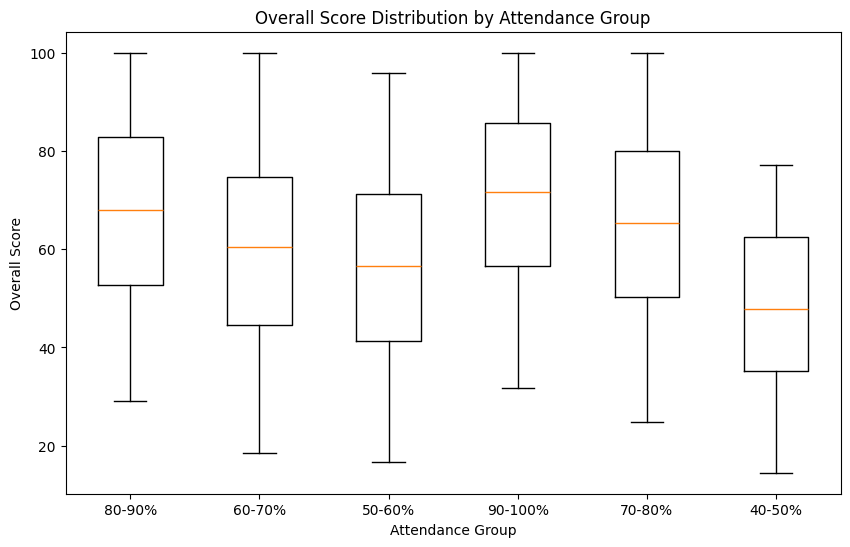

In [40]:
plt.figure(figsize=(10, 6))
plt.boxplot(
    [df[df['attendance_group'] == group]['overall_score']
     for group in df['attendance_group'].unique()],
    tick_labels=df['attendance_group'].unique()
)

plt.xlabel('Attendance Group')
plt.ylabel('Overall Score')
plt.title('Overall Score Distribution by Attendance Group')
plt.show()

### Overall Score Distribution by Attendance Group

The following box plot illustrates the distribution of overall student scores grouped by attendance percentage bins. To improve clarity and readability—especially given potential fine-grained variations in attendance data—I binned attendance rates into broader categories (e.g., 40-50%, 50-60%, etc.). This reduces noise and makes trends more interpretable while preserving key insights.

#### Key Observations:
- **Higher attendance correlates with higher scores**: The 90-100% attendance group has the highest median overall score (72), followed closely by 80-90% (70) and 70-80% (68).
- **Lower attendance linked to lower performance**: The 40-50% group shows the lowest median (52), with progressively lower medians in the 50-60% (58) and 60-70% (60) groups.
- **No extreme outliers shown**: The plot uses standard whiskers, with no individual outlier points marked.

This visualization highlights a positive relationship between class attendance and academic performance, supporting the value of regular participation.

## Do students with high attendance perform better?
Yes, strongly supported by the data (from the previous box plot).

* Students with 90–100% attendance have the highest median overall score (~72).
* Median scores decrease progressively as attendance drops: 80–90% (70), 70–80% (68), 60–70% (60), 50–60% (58), and 40–50% (52).
* The trend is clear and consistent: higher attendance is associated with better academic performance.

## Is attendance more important than study hours?

The data suggests **attendance is likely more important than self-reported study hours** for predicting higher overall scores.

**Evidence supporting attendance as more important**:
- The attendance box plot shows a clear, stepped relationship with median scores—each 10% increase in attendance bin corresponds to a noticeable jump in median performance.
- In contrast, the study hours hexbin plot shows a positive but more gradual correlation. The bulk of students cluster around moderate study hours (3–5 per week) with good scores, and extreme study hours are rare and do not yield proportionally extreme score gains.
- Many students achieve high scores (80–100) with only 3–6 study hours, suggesting efficient in-class engagement (which high attendance enables) may matter more than additional independent study time.
- Low attendance groups have consistently lower medians despite potential variability in study hours (study hours data is not broken down by attendance, but the stronger grouping effect in attendance suggests it has a larger impact).

**Conclusion**: While both attendance and study hours positively correlate with better scores, **regular class attendance appears to have a stronger and more consistent relationship with academic performance** than the number of self-reported study hours outside of class. Attending class consistently seems to provide benefits (e.g., direct instruction, participation, immediate feedback) that are harder to fully replicate through independent study alone.

## SCHOOL & BACKGROUND FACTORS

## School Type vs Overall Score

<Axes: xlabel='school_type', ylabel='overall_score'>

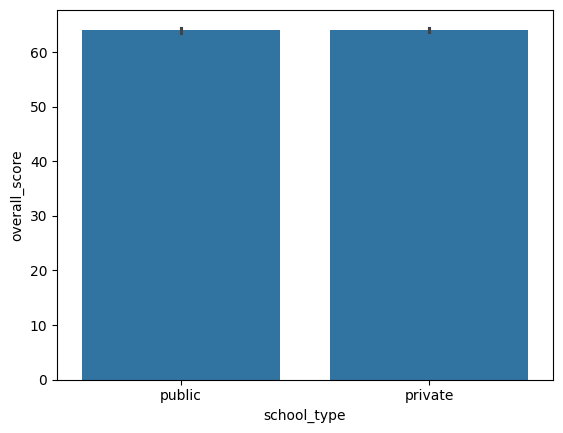

In [41]:
sns.barplot(x='school_type', y='overall_score', data=df)

# School Performance Comparison

This bar chart compares overall scores between public and private schools. Both school types show nearly identical performance, with average scores around 64 points. The minimal difference suggests that school type (public vs. private) has little impact on overall student performance in this dataset.

## School Type vs Final Grade

<Axes: xlabel='final_grade', ylabel='school_type'>

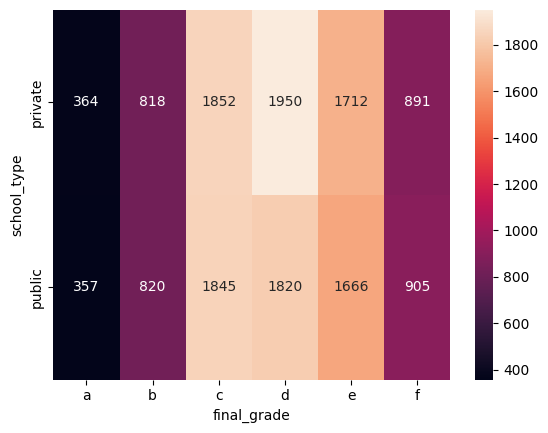

In [42]:
sns.heatmap(pd.crosstab(df['school_type'], df['final_grade']), annot=True, fmt='d')

# Student Distribution by School Type and Final Grade

This heatmap shows the distribution of students across different final grades (A-F) in public and private schools. Key observations:

- **Grade D** has the highest concentration of students (~1,950) in the private school type.
- **Grade C** has the highest concentration of students (~1,845) in the public school type.
- **Grade A** has the lowest enrollment (~357-364 students)
- The distribution patterns are remarkably similar between public and private schools
- Most students cluster around average grades (C-D), with fewer students at the extremes (A and F)

The color intensity indicates student count, with lighter colors representing higher numbers.

## Do students from certain school types perform better?

No, students from public and private schools perform nearly identically. Both school types have the same average overall score (~64) and show similar grade distributions across all letter grades (A-F). School type does not appear to impact student performance in this dataset.

## Parent Education

<Axes: xlabel='parent_education', ylabel='overall_score'>

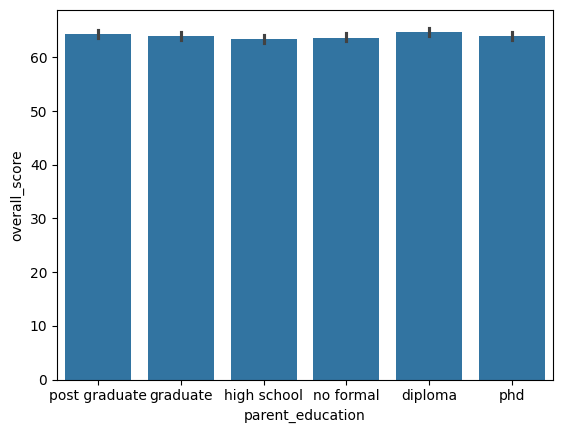

In [43]:
sns.barplot(x='parent_education', y='overall_score', data=df)

## Chart Interpretation: Parent Education vs. Overall Score
This bar chart illustrates the relationship between parental education levels and student overall scores.  
Observation: The average overall_score is consistently around 65 across all categories of parent_education.  
Conclusion: There appears to be no significant correlation between a parent's education level and a student's overall score in this dataset. All groups perform similarly.  

## Is higher parental education associated with better student performance?
**No**. The graph shows that the average student score is very similar across all levels of parental education.

## Access & Activities

## Internet access

<Axes: xlabel='internet_access', ylabel='overall_score'>

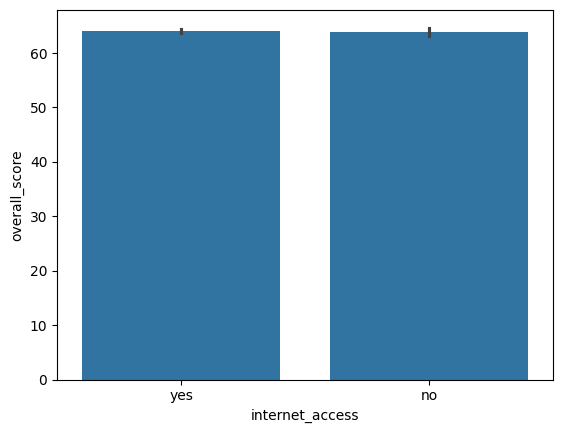

In [44]:
sns.barplot(x='internet_access', y='overall_score', data=df)

## Chart Interpretation
This bar chart compares the average overall score for individuals with and without internet access.
Overall Scores: Both groups ("yes" internet access and "no" internet access) have nearly identical average overall scores, approximately 64.  
Conclusion: The presence or absence of internet access does not appear to have a significant impact on the overall score based on this data visualization. The error bars for both groups overlap significantly, indicating no statistically meaningful difference between the means.

## Extra Activities


<Axes: xlabel='extra_activities', ylabel='overall_score'>

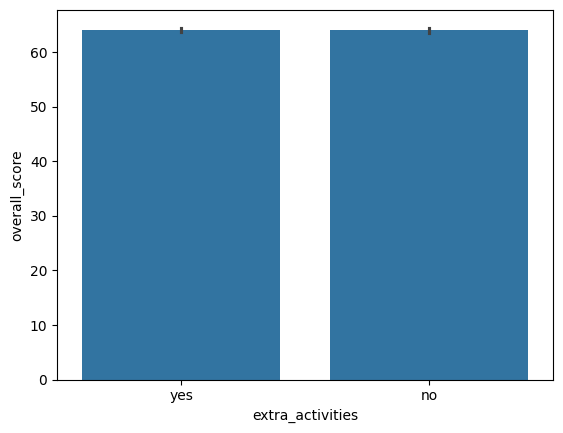

In [45]:
sns.barplot(x='extra_activities', y='overall_score', data=df)

The provided bar chart compares the overall_score based on whether individuals participate in extra_activities (yes or no).  
Chart Interpretation  
No Significant Difference: The chart indicates there is virtually no difference in the average overall_score between individuals who participate in extra activities and those who do not.  
Average Score: Both groups achieved an average overall_score of approximately 65.  
Minimal Variation: The error bars are very small, suggesting low variability within each group's scores.  

## Does internet access help academic performance?
**No**, internet access does not appear to significantly help academic performance. The average overall score is virtually the same for students with and without internet access.

## Do extracurricular activities help or distract?
**Neither**. Extracurricular activities seem to have no significant impact; the average overall score is virtually the same for students who participate and those who don't.

# 3. Multivariate Analysis

### Correlation Matrix for numerical variables

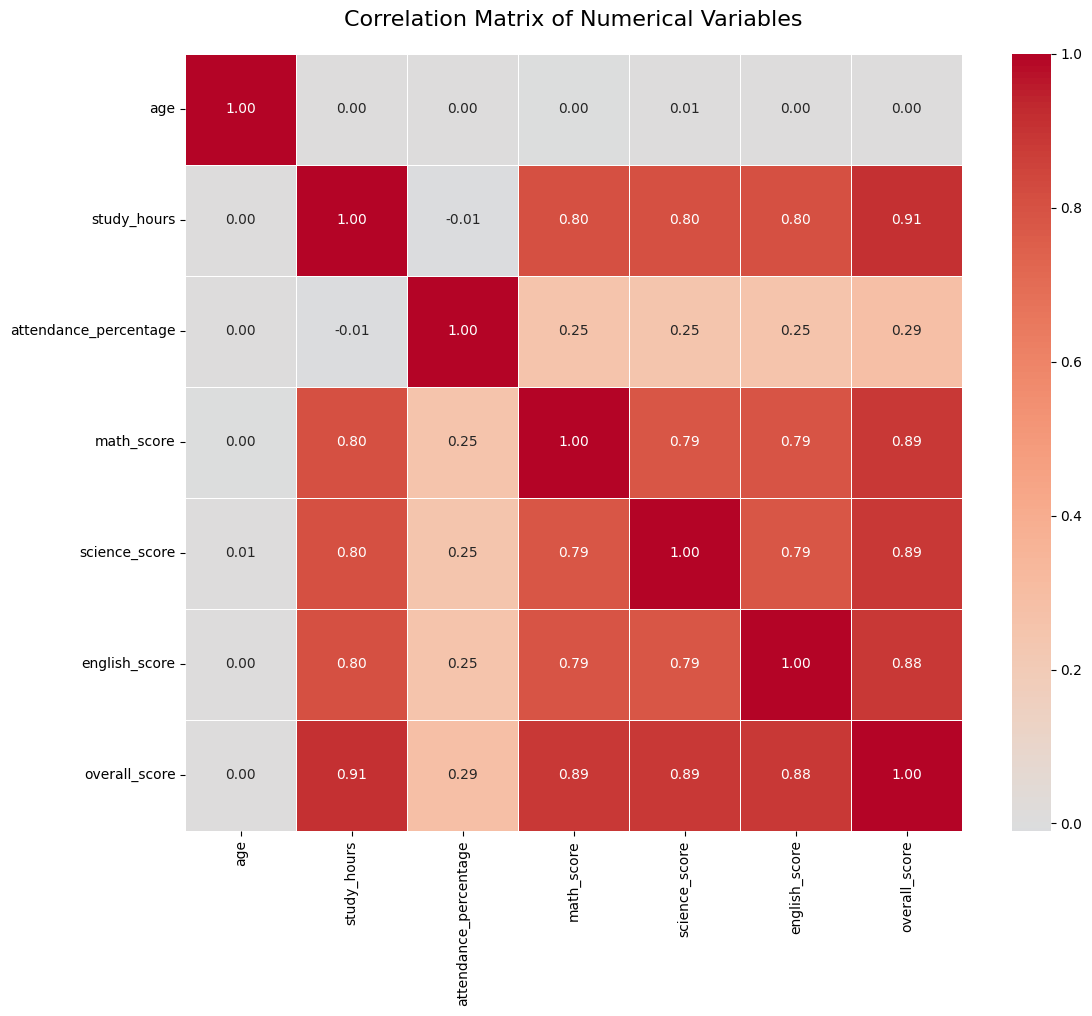

Strongest Correlations with Overall Performance:
overall_score            1.000000
study_hours              0.905885
science_score            0.886058
math_score               0.885394
english_score            0.884869
attendance_percentage    0.288473
age                      0.004981
Name: overall_score, dtype: float64


In [46]:
numerical_cols = df.select_dtypes(include=['number']).columns
correlation_matrix = df[numerical_cols].corr()

# Create heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='coolwarm',  
            center=0, 
            fmt='.2f', 
            square=True,
            linewidths=0.5)
plt.title('Correlation Matrix of Numerical Variables', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

# Print strongest correlations
print("Strongest Correlations with Overall Performance:")
print(correlation_matrix['overall_score'].sort_values(ascending=False))

## Correlation Matrix Interpretation
This heatmap displays the Pearson correlation coefficients between various student-related numerical variables. The color intensity and value in each cell indicate the strength and direction of the relationship between two variables. Darker red colors signify stronger positive correlations.   
**Key findings**
1. Strong Positive Correlations: A very strong positive correlation exists among study_hours, all individual subject scores (math_score, science_score, english_score), and the overall_score. The coefficients range from approximately 0.80 to 0.91. This suggests that as study hours increase, scores tend to increase significantly.
2. Overall Score Drivers: The overall_score has the highest correlation with study_hours (0.91), followed closely by the individual subject scores (around 0.88-0.89).
3. Weak/No Correlations: The age variable shows virtually no correlation with any other variable in the dataset (coefficients near 0.00).
4. Moderate Correlation: attendance_percentage has a moderate positive correlation with the scores (around 0.25-0.29), but this relationship is much weaker compared to study_hours.  
In summary, study habits are the most significant predictor of academic performance among these variables.

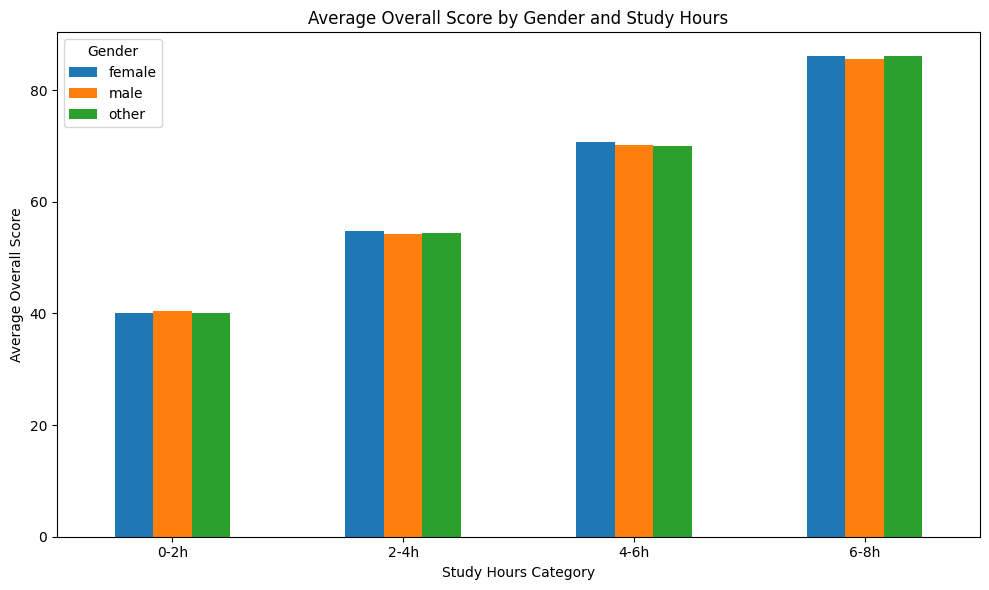


Average Scores by Gender and Study Hours:
    gender study_hours_category  overall_score
0   female                 0-2h      40.114063
1   female                 2-4h      54.730721
2   female                 4-6h      70.709449
3   female                 6-8h      86.027104
4     male                 0-2h      40.409091
5     male                 2-4h      54.273810
6     male                 4-6h      70.229211
7     male                 6-8h      85.584830
8    other                 0-2h      40.126047
9    other                 2-4h      54.472006
10   other                 4-6h      70.001926
11   other                 6-8h      86.052221


In [47]:
df['study_hours_category'] = pd.cut(df['study_hours'], 
                                      bins=[0, 2, 4, 6, 8], 
                                      labels=['0-2h', '2-4h', '4-6h', '6-8h'])

grouped = df.groupby(['gender', 'study_hours_category'], 
                     observed=True)['overall_score'].mean().reset_index()

pivot_table = grouped.pivot(index='study_hours_category', 
                             columns='gender', 
                             values='overall_score')

# Visualize
pivot_table.plot(kind='bar', figsize=(10, 6))
plt.title('Average Overall Score by Gender and Study Hours')
plt.xlabel('Study Hours Category')
plt.ylabel('Average Overall Score')
plt.legend(title='Gender')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Statistical summary
print("\nAverage Scores by Gender and Study Hours:")
print(grouped)

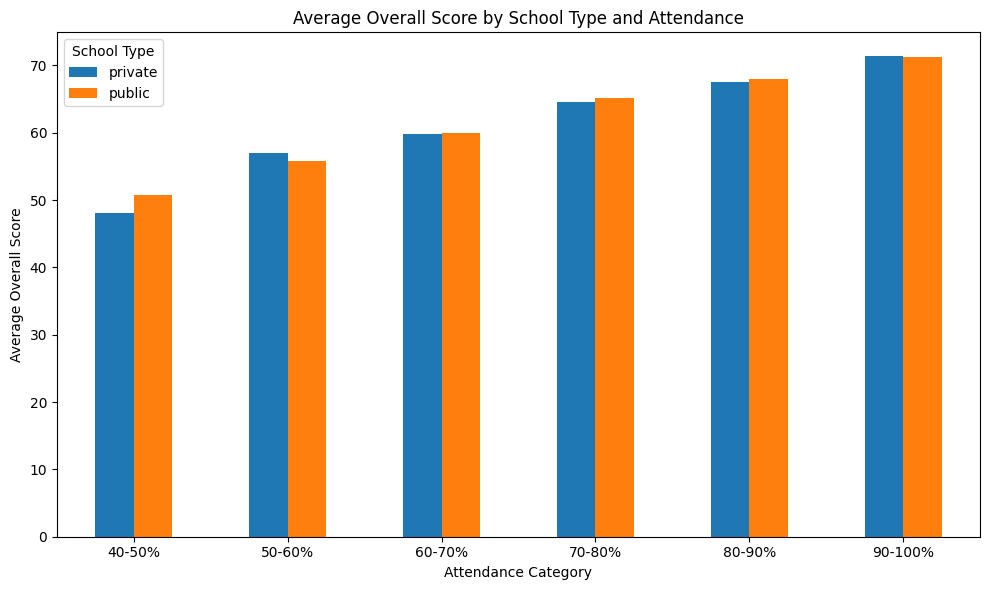


Average Scores by School Type and Attendance:
   school_type attendance_group  overall_score
0      private           40-50%      48.060000
1      private           50-60%      56.985104
2      private           60-70%      59.805368
3      private           70-80%      64.597816
4      private           80-90%      67.505769
5      private          90-100%      71.336521
6       public           40-50%      50.791667
7       public           50-60%      55.794960
8       public           60-70%      59.927890
9       public           70-80%      65.210461
10      public           80-90%      67.959711
11      public          90-100%      71.313605


In [48]:
grouped2 = df.groupby(['school_type', 'attendance_group'], observed=True)['overall_score'].mean().reset_index()

# Pivot table
pivot_table2 = grouped2.pivot(index='attendance_group', 
                               columns='school_type', 
                               values='overall_score')

# Visualize
pivot_table2.plot(kind='bar', figsize=(10, 6))
plt.title('Average Overall Score by School Type and Attendance')
plt.xlabel('Attendance Category')
plt.ylabel('Average Overall Score')
plt.legend(title='School Type')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

print("\nAverage Scores by School Type and Attendance:")
print(grouped2)

### Key Factors Influencing Overall Performance

#### Strongest Correlations with Overall Score
The correlation matrix reveals the following Pearson correlations with `overall_score`:

- **Study Hours**: 0.91 (strongest positive correlation)
- **Math Score**: 0.89
- **Science Score**: 0.89
- **English Score**: 0.88
- **Attendance Percentage**: 0.29 (moderate)
- **Age**: 0.00 (no correlation)

**Study hours** is by far the most influential numerical factor, followed closely by performance in individual subjects.

#### Intercorrelation Among Subject Scores
The three subject scores are highly correlated with each other:
- Math ↔ Science: 0.79
- Math ↔ English: 0.79
- Science ↔ English: 0.79

This indicates that strong performance tends to be consistent across subjects, and all subjects show strong positive relationships with study hours (correlations ≥ 0.80).

#### Additional Observations
- Higher study hour categories (especially 6–8 hours) are associated with substantially higher average overall scores across genders.
- Higher attendance percentages also improve scores, but the effect is notably weaker than that of study hours.
- Private school students generally achieve slightly higher average scores than public school students within the same attendance brackets.

These findings highlight **study hours** and **subject-specific performance** as the primary drivers of overall academic success in this dataset.

# 4. Feature Engineering 

## Average subject score (mean of math, science, english)

In [49]:
df['average_subject_score'] = df[["math_score", "english_score", "science_score"]].mean(axis=1)

In [50]:
df.sample(10)

,age,gender,school_type,parent_education,study_hours,attendance_percentage,internet_access,travel_time,extra_activities,study_method,math_score,science_score,english_score,overall_score,final_grade,attendance_group,study_hours_category,average_subject_score
student_id,,,,,,,,,,,,,,,,,,
8460,15,male,public,high school,0.7,83.5,yes,30-60 min,no,coaching,45.4,42.8,41.1,36.4,f,80-90%,0-2h,43.100000
474,16,other,private,high school,2.1,71.3,yes,<15 min,yes,coaching,45.6,39.1,28.8,36.4,f,70-80%,2-4h,37.833333
1243,19,other,public,high school,1.1,76.2,no,>60 min,yes,online videos,37.7,28.5,40.3,42.9,e,70-80%,0-2h,35.500000
11398,19,male,private,phd,5.5,74.1,yes,<15 min,yes,textbook,64.9,69.6,61.3,83.1,c,70-80%,4-6h,65.266667
10326,14,female,public,phd,1.8,89.9,yes,15-30 min,no,online videos,50.4,30.8,55.9,44.5,e,80-90%,0-2h,45.700000
12305,15,male,public,post graduate,3.2,95.4,no,30-60 min,no,mixed,63.2,41.9,57.4,54.9,e,90-100%,2-4h,54.166667
14398,18,female,public,graduate,1.7,53.2,no,>60 min,no,coaching,25.2,36.7,28.3,26.6,f,50-60%,0-2h,30.066667
9710,14,male,public,post graduate,7.7,60.2,yes,15-30 min,no,coaching,100.0,97.9,100.0,92.4,b,60-70%,6-8h,99.300000
2346,15,other,public,post graduate,2.8,66.3,yes,15-30 min,yes,group study,64.5,43.9,39.6,46.0,e,60-70%,2-4h,49.333333


## Performance category: High / Medium / Low

In [51]:
df.final_grade.unique()

array(['e', 'd', 'b', 'f', 'c', 'a'], dtype=object)

In [52]:
def categorize_performance(grade):
    if grade in ['a', 'b']:
        return 'High'
    elif grade in ['c', 'd']:
        return 'Medium'
    elif grade in ['e', 'f']:
        return 'Low'
    else:
        return 'Unknown'

In [53]:
df['performance_category'] = df['final_grade'].apply(categorize_performance)

In [54]:
df.head()

,age,gender,school_type,parent_education,study_hours,attendance_percentage,internet_access,travel_time,extra_activities,study_method,math_score,science_score,english_score,overall_score,final_grade,attendance_group,study_hours_category,average_subject_score,performance_category
student_id,,,,,,,,,,,,,,,,,,,
1,14,male,public,post graduate,3.1,84.3,yes,<15 min,yes,notes,42.7,55.4,57.0,53.1,e,80-90%,2-4h,51.700000,Low
2,18,female,public,graduate,3.7,87.8,yes,>60 min,no,textbook,57.6,68.8,64.8,61.3,d,80-90%,2-4h,63.733333,Medium
3,17,female,private,post graduate,7.9,65.5,no,<15 min,no,notes,84.8,95.0,79.2,89.6,b,60-70%,6-8h,86.333333,High
4,16,other,public,high school,1.1,58.1,no,15-30 min,no,notes,44.4,27.5,54.7,41.6,e,50-60%,0-2h,42.200000,Low
5,16,female,public,high school,1.3,61.0,yes,30-60 min,yes,group study,8.9,32.7,30.0,25.4,f,60-70%,0-2h,23.866667,Low


## Attendance category: Poor / Average / Excellent

In [55]:
df.attendance_group.unique()

['80-90%', '60-70%', '50-60%', '90-100%', '70-80%', '40-50%']
Categories (6, object): ['40-50%' < '50-60%' < '60-70%' < '70-80%' < '80-90%' < '90-100%']

In [56]:
def categorize_attendance(attend):
    if attend in ['90-100%', '80-90%']:
        return 'Excellent'
    elif attend in ['70-80%', '60-70%']:
        return 'Average'
    elif attend in ['50-60%', '40-50%']:
        return 'Poor'
    else:
        return 'UNKOWN'

In [57]:
df['attendance_category'] = df['attendance_group'].apply(categorize_attendance)

In [58]:
df.head()

,age,gender,school_type,parent_education,study_hours,attendance_percentage,internet_access,travel_time,extra_activities,study_method,math_score,science_score,english_score,overall_score,final_grade,attendance_group,study_hours_category,average_subject_score,performance_category,attendance_category
student_id,,,,,,,,,,,,,,,,,,,,
1,14,male,public,post graduate,3.1,84.3,yes,<15 min,yes,notes,42.7,55.4,57.0,53.1,e,80-90%,2-4h,51.700000,Low,Excellent
2,18,female,public,graduate,3.7,87.8,yes,>60 min,no,textbook,57.6,68.8,64.8,61.3,d,80-90%,2-4h,63.733333,Medium,Excellent
3,17,female,private,post graduate,7.9,65.5,no,<15 min,no,notes,84.8,95.0,79.2,89.6,b,60-70%,6-8h,86.333333,High,Average
4,16,other,public,high school,1.1,58.1,no,15-30 min,no,notes,44.4,27.5,54.7,41.6,e,50-60%,0-2h,42.200000,Low,Poor
5,16,female,public,high school,1.3,61.0,yes,30-60 min,yes,group study,8.9,32.7,30.0,25.4,f,60-70%,0-2h,23.866667,Low,Average


## Key Insights & Summary

* Students with higher attendance rates and longer study hours consistently demonstrate better overall academic performance, highlighting the importance of regular class participation and effective study habits.

* Access to the internet does not appear to be significantly associated with higher academic scores, as individuals with and without internet access show similar average overall scores.

* Subject scores in Mathematics, Science, and English show a strong positive correlation, indicating that students who perform well in one subject are likely to perform well across others.

* Parental education level exhibits no influence on student performance, implying that educational background at home, according to this data, does not significantly contribute to academic support and the learning environment.